In [3]:
# Librerias
#pip install alpaca-py
#!pip install backtesting
#!pip install TA-Lib

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

#from backtesting import Strategy
#import talib as ta

In [4]:
# Cuenta
KEY = 'PKN8ROXQFMTWHU1FZFNX'
SECRET = 'wTI58fvbdJ9jGpLloyNeZr1DOxfW1VRczQhgXXik'

In [5]:
# Instanciamos la clase principal

trading_client = TradingClient(KEY, SECRET, paper=True)

In [10]:
# ver posiciones
trading_client.get_all_positions()

[]

In [11]:
# cerrar posiciones
trading_client.close_all_positions(cancel_orders = True)

[]

In [20]:
client = StockHistoricalDataClient(KEY, SECRET)

parametros = StockBarsRequest(
    symbol_or_symbols = ['SPY'],
    timeframe = TimeFrame.Day,
    start = datetime (2000,1,1),
    end = datetime (2024,4,19)
)
barras = client.get_stock_bars(parametros)
data_apple = barras.df
print(data_apple)

                                     open     high     low     close  \
symbol timestamp                                                       
SPY    2016-01-04 05:00:00+00:00  200.490  201.030  198.59  201.0192   
       2016-01-05 05:00:00+00:00  201.405  201.900  200.05  201.3600   
       2016-01-06 05:00:00+00:00  198.330  200.060  197.60  198.8200   
       2016-01-07 05:00:00+00:00  195.330  197.440  193.59  194.0500   
       2016-01-08 05:00:00+00:00  195.190  195.850  191.58  191.9230   
...                                   ...      ...     ...       ...   
       2024-04-12 04:00:00+00:00  514.370  515.815  509.08  510.8500   
       2024-04-15 04:00:00+00:00  515.130  515.300  503.58  504.4500   
       2024-04-16 04:00:00+00:00  504.940  506.500  502.21  503.5300   
       2024-04-17 04:00:00+00:00  506.050  506.220  499.12  500.5500   
       2024-04-18 04:00:00+00:00  501.980  504.130  498.56  499.5200   

                                       volume  trade_count     

In [21]:
df = data_apple
df = df.drop(['trade_count','vwap'], axis=1)
df = df.rename(columns= {'open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'})
df = df.reset_index(level=[1])
df = df.set_index('timestamp')
df.tail(50) # Alpaca ofrece sólo unos 7 años de histórico (compra la data a terceros)

,Open,High,Low,Close,Volume
timestamp,,,,,
2024-02-07 05:00:00+00:00,496.29,498.5300,495.3600,498.10,70556506.0
2024-02-08 05:00:00+00:00,498.10,498.7100,497.2600,498.32,52343636.0
2024-02-09 05:00:00+00:00,498.84,501.6500,498.4900,501.20,63961429.0
2024-02-12 05:00:00+00:00,501.17,503.5000,500.2400,500.98,56502283.0
2024-02-13 05:00:00+00:00,494.53,497.0900,490.7150,494.08,113099199.0
2024-02-14 05:00:00+00:00,496.79,499.0700,494.4000,498.57,68387827.0
2024-02-15 05:00:00+00:00,499.29,502.2000,498.7950,502.01,61682960.0
2024-02-16 05:00:00+00:00,501.70,502.8700,498.7500,499.51,75481032.0
2024-02-20 05:00:00+00:00,497.72,498.4100,494.4500,496.76,71736740.0


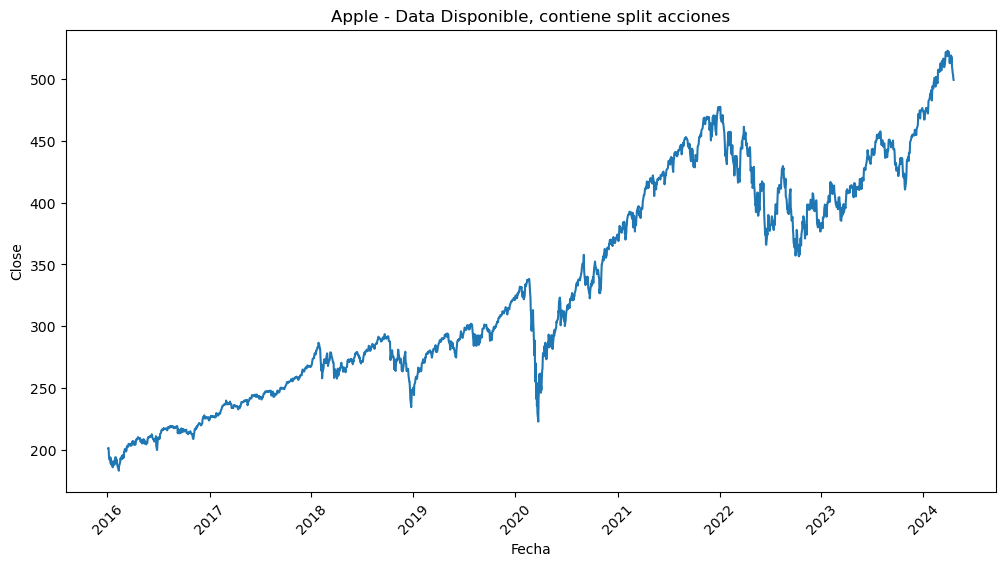

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title('Apple - Data Disponible, contiene split acciones')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.show()

In [23]:
df.to_csv('SPY_index_from2016_to2024.csv', index=False)